<a href="https://colab.research.google.com/github/brunorosilva/ai_especialization_usp/blob/master/Exerc%C3%ADcios_de_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios de Python: Análise de dados

Para estes exercícios vamos usar bibliotecas do pacote SciPy, especificamente a biblioteca Pandas.

## 1. Preparando o Ambiente:

Execute a célula abaixo para carregar os pacotes necessários para a execução do ambiente.
Estes pacotes são a ```urllib.request``` (para recuperar recursos da internet via http), a ```io``` (para decodificar arquivos-texto via ```TextIOWrapper```), a bilioteca ```pandas``` e o pacote ```HTML```.



In [0]:
import urllib.request as request
import io
import pandas as pd
from IPython.core.display import HTML

# 2. Dados de Fluxo Escolar da Secretaria Estadual de Educação.

A célula abaixo recupera do portal de dados do Governo Estadual os dados de Fluxo Escolar (aprovação) das diretorias da Secretaria Estadual de Educação.

In [0]:
aprovacao_2017=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/sites/default/files/Fluxo_Escolar_por_DE_2017%20%284%29.csv")
, "utf-8-sig"))

Eis as primeiras 6 linhas da base de dados:

In [3]:
aprovacao_2017.head(6)

,Ano,CD_DIRETORIA,NM_DIRETORIA,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3
0,2017,10102,CENTRO,98.93,0.81,0.26,92.01,6.71,1.28,86.78,11.23,1.99
1,2017,20304,ITAPETININGA,98.86,1.14,0.00,96.81,2.65,0.54,92.54,6.02,1.44
2,2017,10703,ITAPEVI,0.00,0.00,0.00,91.47,6.92,1.61,87.79,8.57,3.64
3,2017,10503,ITAQUAQUECETUBA,97.99,1.77,0.24,93.72,5.46,0.82,86.63,11.46,1.91
4,2017,10603,SANTO ANDRE,98.48,1.44,0.08,93.35,6.14,0.51,84.97,13.64,1.39
5,2017,10208,LESTE 4,99.01,0.81,0.18,91.17,7.58,1.25,79.86,17.25,2.89


A explicação para o significado destes dados está no próprio [dicionário de dados](https://dados.educacao.sp.gov.br/dicionario-fluxo-escolar) disponibilizado pela secretaria.

## Conceito: Endereçando DataFrames

Uma série pode ser obtida a partir da *coluna* um DataFrame usando o operador colchetes passando-se o *nome* da coluna.

Exemplo:

In [4]:
dataframe_exemplo_1 = pd.DataFrame([[1,2],[3,4]], index=[1,2], columns=["C1", "C2"])
display(HTML("<tt>dataframe_exemplo_1</tt>:"))
display(HTML(dataframe_exemplo_1.to_html()))
display(HTML("<tt>dataframe_exemplo_1[\"C2\"]</tt>:"))
print(dataframe_exemplo_1["C2"])

,C1,C2
1,1,2
2,3,4


1    2
2    4
Name: C2, dtype: int64


É possível endereçar um Dataframe por linha e por coluna por meio do atributo ```loc``` e do operador colchetes.

Exemplo:

In [5]:
display(HTML("<tt>dataframe_exemplo_1.loc[2]</tt>:"))
print(dataframe_exemplo_1.loc[2])
display(HTML("<tt>dataframe_exemplo_1.loc[2,\"C2\"]</tt>:"))
print(dataframe_exemplo_1.loc[2, "C2"])

C1    3
C2    4
Name: 2, dtype: int64


4


## *Questão 1*:

O método ```idxmin()``` aplicado a uma *série* recupera o índice da entrada de *menor* valor. 

Escreva código em Python que imprime o *nome* da diretoria com a *menor* taxa de aprovação no ensino médio.

*Lembrete*: Você precisa obter uma Série com a aprovação dos alunos no ensino médio.
Use o dicionário de dados para determinar qual o nome da coluna apropriado e enderece a coluna no dataframe empregando o operador colchetes ```[]```.

In [10]:
### Complete seu código
ind = aprovacao_2017[['APR_3']].idxmin() # pegando o index de menor valor
print(aprovacao_2017['NM_DIRETORIA'][ind].values[0])

SUL 3


# 3. Dados de Total de Alunos Matriculados Escolar da Secretaria Estadual de Educação.


A célula abaixo recupera do portal de dados do Governo Estadual os dados de Fluxo Escolar (aprovação) das diretorias da Secretaria Estadual de Educação.

(Note que o csv original *não* tem nome das colunas, estas foram adicionadas posteriormente).

In [0]:
alunos_matriculados=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/sites/default/files/VW_ALUNOS_POR_ESCOLA_20190517_0.csv")), header=None, delimiter=";").loc[:,0:24]
alunos_matriculados.columns=["CDREDE", "DE", "CODMUN", "MUN", "CATEG", "COD_ESC", "TIPOESC", "CODVINC", "NOMESC", "ENDESC", "NUMESC", "BAIESC", "EMAIL", "FONE1", "ZONA", "ED_INFANTIL", "CLASSES ESPECIAIS", "SALA DE RECURSO", "ANOS INICIAIS", "ANOS FINAIS", "ENSINO MEDIO", "EJA FUNDAMENTAL_AI", "EJA ENSINO MÉDIO", "EJA FUNDAMENTAL_AF", "EJA FUNDAMENTAL_MULTI"]

Eis as primeiras 6 linhas desta base de dados.

In [12]:
alunos_matriculados.head(6)

,CDREDE,DE,CODMUN,MUN,CATEG,COD_ESC,TIPOESC,CODVINC,NOMESC,ENDESC,NUMESC,BAIESC,EMAIL,FONE1,ZONA,ED_INFANTIL,CLASSES ESPECIAIS,SALA DE RECURSO,ANOS INICIAIS,ANOS FINAIS,ENSINO MEDIO,EJA FUNDAMENTAL_AI,EJA ENSINO MÉDIO,EJA FUNDAMENTAL_AF,EJA FUNDAMENTAL_MULTI
0,10101,NORTE 1,100,SAO PAULO,1,12,8,12,AYRES DE MOURA PROFESSOR,RUA ARTUR ORLANDO,907,VILA JAGUARA,E000012A@EDUCACAO.SP.GOV.BR,36251633.0,1,0,0,0,0,562,0,0,0,0,0
1,10101,NORTE 1,100,SAO PAULO,1,24,8,24,GAVIAO PEIXOTO BRIGADEIRO,MOGEIRO,710,VILA PERUS,E000024A@EDUCACAO.SP.GOV.BR,39156810.0,1,0,0,0,523,473,1073,0,0,687,0
2,10101,NORTE 1,100,SAO PAULO,1,36,8,36,JOAO SOLIMEO,DO SABAO,1497,JARDIM MARISTELA,E000036A@EDUCACAO.SP.GOV.BR,39228491.0,1,0,0,26,0,1204,932,0,0,0,0
3,10101,NORTE 1,100,SAO PAULO,1,48,8,48,WALFREDO ARANTES CALDAS PROFESSOR,DEPUTADO CANTIDIO SAMPAIO,1701,VILA SOUZA,E000048A@EDUCACAO.SP.GOV.BR,38513005.0,1,0,0,0,0,0,1140,0,0,0,0
4,10101,NORTE 1,100,SAO PAULO,1,59,8,59,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,RUA FRANCISCO GIRON,SN,MORRO DOCE,E000059A@EDUCACAO.SP.GOV.BR,39111913.0,1,0,0,0,0,0,1071,0,0,0,0
5,10101,NORTE 1,100,SAO PAULO,1,61,8,61,SUZANA DE CAMPOS DONA,ANTONIO MAIA,691,VILA PERUS,E000061A@EDUCACAO.SP.GOV.BR,39156049.0,1,0,0,11,896,0,0,0,0,0,0


A explicação para o significado destes dados está no próprio [dicionário de dados](https://dados.educacao.sp.gov.br/dicion%C3%A1rio-de-dados-de-quantidade-de-alunos-por-tipo-de-ensino) disponibilizado pela secretaria.

Nota-se que o campo ```CDREDE``` corresponde ao código do campo ```CD_DIRETORIA``` da base ```aprovacao_2017```.

Os dados, no entanto, *não* estão agrupados por diretoria de ensino, mas por *escola*.


## Conceito: Agrupando dados

Em pandas é possível agrupar dados de um dataframe que tenham o mesmo valor em uma coluna através do método ```groupby()```, passando-se como parâmetro o *nome* da coluna que deve ser usada para agrupar.

O resultado é um *grupo de dataframes*.
Este grupo pode ser explorado elemento-a-elemento, ou *aglutinado*.

A aglutinação vai produzir um novo DataFrame no qual os *índices* serão os valores dos campos da coluna escolhida para fazer o agrupamento e as colunas serão o resultado de alguma operação aglutinadora sobre as colunas de cada agrupamento (algumas colunas podem ser descartadas neste processo).

O exemplo a seguir mostra o uso da operação aglutinadora ```sum``` sobre um dataframe de produtos para determinar a quantidade de produtos de cada cor.

In [0]:
dataframe_exemplo_2 = pd.DataFrame({"Produto": ["bola", "bicicleta", "patinete", "pião", "bambolê"], "Cor": ["branco", "vermelho", "verde", "branco", "vermelho"], "Quantidade": [10, 15, 10, 20,30]})
display(HTML("<tt>dataframe_exemplo_2</tt>:"))
display(HTML(dataframe_exemplo_2.to_html()))
dataframe_exemplo_2_por_cor = dataframe_exemplo_2.groupby("Cor");
print("Resultados de dataframe_exemplo_2.groupby('Cor'):")
for name, d in dataframe_exemplo_2_por_cor:
  print(name + ":")
  display(HTML(d.to_html()))
print("Resultados de dataframe_exemplo_2.groupby('Cor').sum():")
display(HTML(dataframe_exemplo_2_por_cor.sum().to_html()))

,Produto,Cor,Quantidade
0,bola,branco,10
1,bicicleta,vermelho,15
2,patinete,verde,10
3,pião,branco,20
4,bambolê,vermelho,30


Resultados de dataframe_exemplo_2.groupby('Cor'):
branco:


,Produto,Cor,Quantidade
0,bola,branco,10
3,pião,branco,20


verde:


,Produto,Cor,Quantidade
2,patinete,verde,10


vermelho:


,Produto,Cor,Quantidade
1,bicicleta,vermelho,15
4,bambolê,vermelho,30


Resultados de dataframe_exemplo_2.groupby('Cor').sum():


,Quantidade
Cor,
branco,30
verde,10
vermelho,45


## *Questão 2*:

Crie a partir da base ```alunos_matriculados``` um novo dataframe chamado ```total_alunos_por_diretoria``` que contém o *total* de alunos em cada diretoria *indexado* pelo código de diretoria (o campo ```CDREDE```).

Depois escreva um código em python que mostra o *código* da diretoria com o *maior* número de alunos *no ensino médio*.

In [20]:
# Complete seu código
# não foi descrito quais alunos devem estar nesse novo dataset, então só vou
# adicionar os alunos de ensino médio
total_alunos_por_diretoria = alunos_matriculados.groupby('CDREDE').agg({
    'ENSINO MEDIO':'sum'
})
print(total_alunos_por_diretoria.idxmax()[0])

10101


# 4 - Investigando relação entre dados

Postula-se a seguinte hipótese: "Quanto maior a quantidade de alunos gerenciada, pior o desempenho dos mesmos."

Para investigá-la, vamos vincular a base ```aprovacao_2017``` e a ```total_alunos_por_diretoria``` criada na questão 2

## Conceito: Mesclando bases de dados

É possível vincular duas bases de dados que compartilhem de um mesmo campo (ou índice) através da função *pd.merge*.

Exemplo:

In [0]:
dataframe_exemplo_3 = pd.DataFrame({"Produto": ["bola", "bicicleta", "patinete", "pião", "bambolê"], "COD_Cor": [1, 2, 3, 1, 2], "Quantidade": [10, 15, 10, 20,30]})
dataframe_exemplo_4 = pd.DataFrame({"COD_Cor": [1, 2, 3], "Nome_Cor": ["branco", "vermelho", "azul"]})
display(HTML("<tt>dataframe_exemplo_3</tt>:"))
display(HTML(dataframe_exemplo_3.to_html()))
display(HTML("<tt>dataframe_exemplo_4</tt>:"))
display(HTML(dataframe_exemplo_4.to_html()))
print("Resultados de pd.merge(dataframe_exemplo_3, dataframe_exemplo_4):")
display(HTML(pd.merge(dataframe_exemplo_3, dataframe_exemplo_4).to_html()))

,Produto,COD_Cor,Quantidade
0,bola,1,10
1,bicicleta,2,15
2,patinete,3,10
3,pião,1,20
4,bambolê,2,30


,COD_Cor,Nome_Cor
0,1,branco
1,2,vermelho
2,3,azul


Resultados de pd.merge(dataframe_exemplo_3, dataframe_exemplo_4):


,Produto,COD_Cor,Quantidade,Nome_Cor
0,bola,1,10,branco
1,pião,1,20,branco
2,bicicleta,2,15,vermelho
3,bambolê,2,30,vermelho
4,patinete,3,10,azul


Este exemplo é trivial por que existe apenas *uma* coluna com nome comum entre as duas bases de dados.

Caso exista mais de uma coluna com o nome em comum, ou as colunas de interesse tenham nomes distintos nas duas bases de dados, é necessário passar parâmetros opcionais:

- ```on```: Nome da coluna, presente em *ambas* as bases, que deve ser usada para fazer o casamento dos dados.

- ```left_on```: Nome da coluna na primeira base de dados que é usada para fazer o casamento dos dados.

- ```right_on```: Nome da coluna na segunda base de dados que é usada para fazer o casamento dos dados.

- ```left_index```: ```True``` se o *índice* da primeira base (ou série) é o que deve ser usado para fazer o casamento. ```False``` caso contrário.

- ```right_index```: ```True``` se o *índice* da segunda base (ou série) é o que deve ser usado para fazer o casamento. ```False``` caso contrário.

Eis uma versão do exemplo acima com o casamento entre uma coluna e um índice:


In [0]:
serie_exemplo_5 = pd.Series(["branco", "vermelho", "azul"], index=[1,2,3], name = "Nome_Cor")
print(serie_exemplo_5)
print("Resultados de pd.merge(dataframe_exemplo_3, serie_exemplo_5, left_on='COD_Cor', right_index=True):")
display(HTML(pd.merge(dataframe_exemplo_3, serie_exemplo_5, left_on='COD_Cor', right_index=True).to_html()))

1      branco
2    vermelho
3        azul
Name: Nome_Cor, dtype: object
Resultados de pd.merge(dataframe_exemplo_3, serie_exemplo_5, left_on='COD_Cor', right_index=True):


,Produto,COD_Cor,Quantidade,Nome_Cor
0,bola,1,10,branco
3,pião,1,20,branco
1,bicicleta,2,15,vermelho
4,bambolê,2,30,vermelho
2,patinete,3,10,azul



## *Questão 3*:

Una as bases ```aprovacao_2017``` e ```total_alunos_por_diretoria``` que você criou na questão 2.
Use o campo ```CD_DIRETORIA``` da base ```aprovacao_2017```.

Atribua o resultado à base ```total_alunos_e_desempenho_por_diretoria```

In [25]:
total_alunos_e_desempenho_por_diretoria = pd.merge(aprovacao_2017, total_alunos_por_diretoria, left_on="CD_DIRETORIA", right_index=True)
total_alunos_e_desempenho_por_diretoria

,Ano,CD_DIRETORIA,NM_DIRETORIA,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3,ENSINO MEDIO
0,2017,10102,CENTRO,98.93,0.81,0.26,92.01,6.71,1.28,86.78,11.23,1.99,13152
1,2017,20304,ITAPETININGA,98.86,1.14,0.00,96.81,2.65,0.54,92.54,6.02,1.44,12301
2,2017,10703,ITAPEVI,0.00,0.00,0.00,91.47,6.92,1.61,87.79,8.57,3.64,22721
3,2017,10503,ITAQUAQUECETUBA,97.99,1.77,0.24,93.72,5.46,0.82,86.63,11.46,1.91,18862
4,2017,10603,SANTO ANDRE,98.48,1.44,0.08,93.35,6.14,0.51,84.97,13.64,1.39,18516
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2017,20701,CATANDUVA,0.00,0.00,0.00,97.23,2.28,0.49,93.66,4.48,1.86,6679
87,2017,20801,ANDRADINA,0.00,0.00,0.00,97.05,2.32,0.63,94.36,4.07,1.57,4594
88,2017,20901,ADAMANTINA,0.00,0.00,0.00,93.84,5.81,0.35,89.84,9.01,1.15,6414
89,2017,20409,MOGI MIRIM,98.34,1.45,0.21,93.47,4.51,2.02,88.00,6.50,5.50,15832


Se o seu código foi bem executado, a instrução a seguir deve mostrar um gráfico de pontos com total de alunos no ensino médio por diretoria e o índice de aprovação.

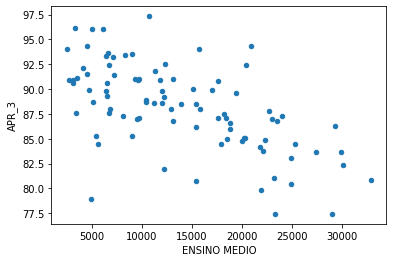

In [26]:
total_alunos_e_desempenho_por_diretoria.plot.scatter(x="ENSINO MEDIO", y="APR_3")